In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
import scipy.integrate as integrate
import scipy.interpolate as interpolate

## Part A
Plot the incompressible pressure coefficients on the upper and lower surfaces

In [2]:
mach_num = 0.6
x_vec = np.linspace(0, 1, num=500)

def cp_upper(x):
    return -3.1 * np.power(x, 0.5) * (1 - x)

def cp_lower(x):
    return -1.3 * np.power(x, 0.5) * np.power((1 - x),2)

In [3]:
upper = cp_upper(x_vec)
lower = cp_lower(x_vec)

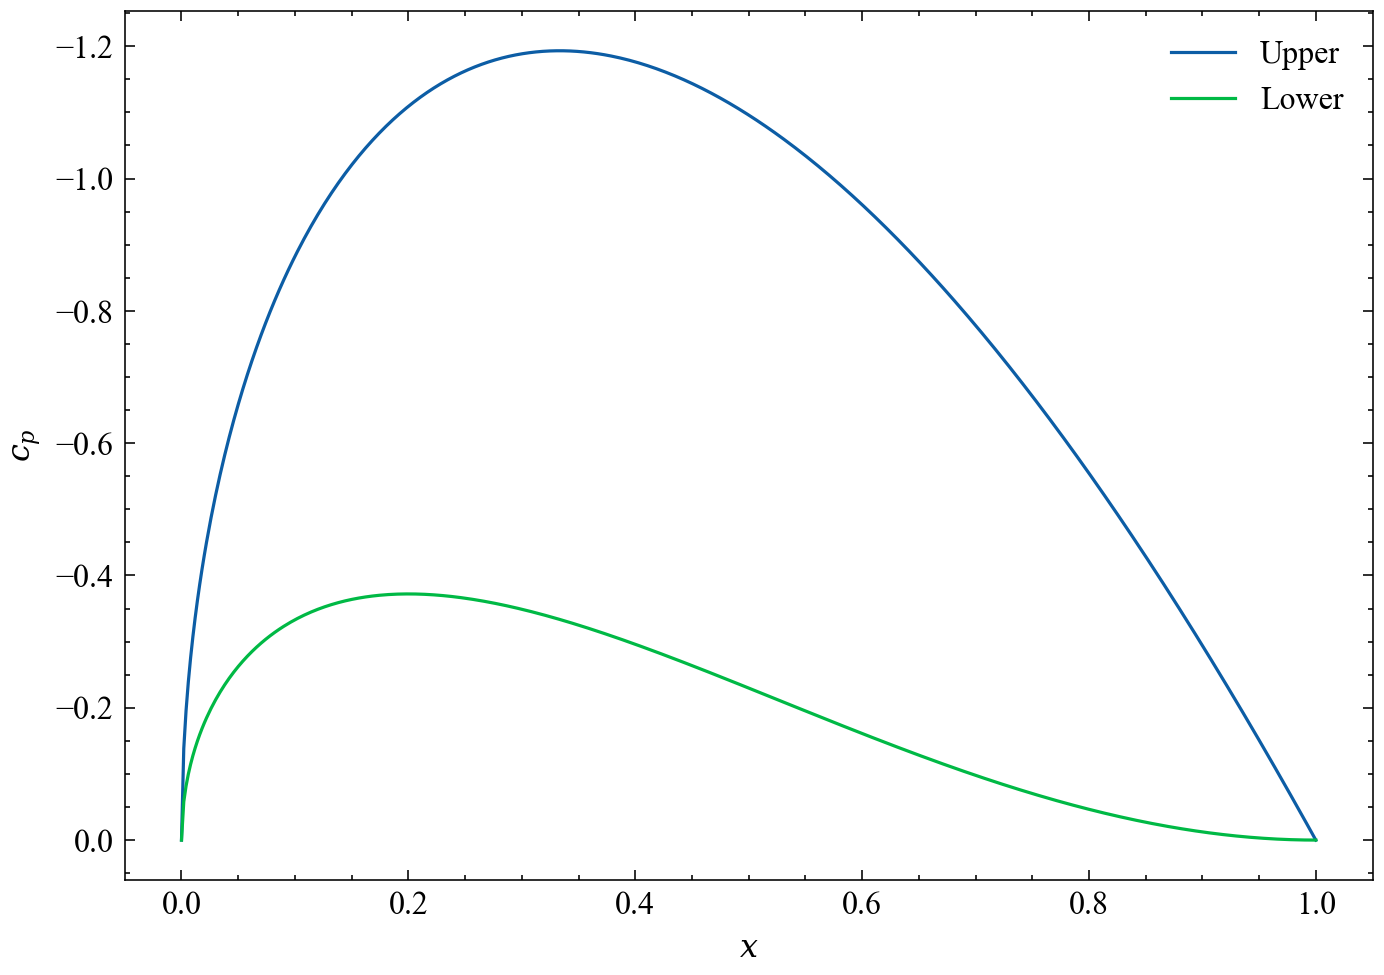

In [4]:
plt.figure(dpi=230, figsize=(7,5))
plt.style.use(['science', 'no-latex'])

plt.plot(x_vec, upper, label='Upper')
plt.plot(x_vec, lower, label='Lower')

plt.xlabel(r'$x$')
plt.ylabel(r'$c_p$')

plt.gca().invert_yaxis()
plt.legend()

plt.show()

## Part B
Apply the Prandtl-Glauert correction to the incompressible pressure coefficients, plot the compressible pressure coefficients on the upper and lower surfaces for Mach 0.6 flow, and calculate the lift coefficient.

In [5]:
pg_correction = 1 / np.sqrt(1 - np.power(mach_num, 2))

upper_corrected = upper * pg_correction
lower_corrected = lower * pg_correction

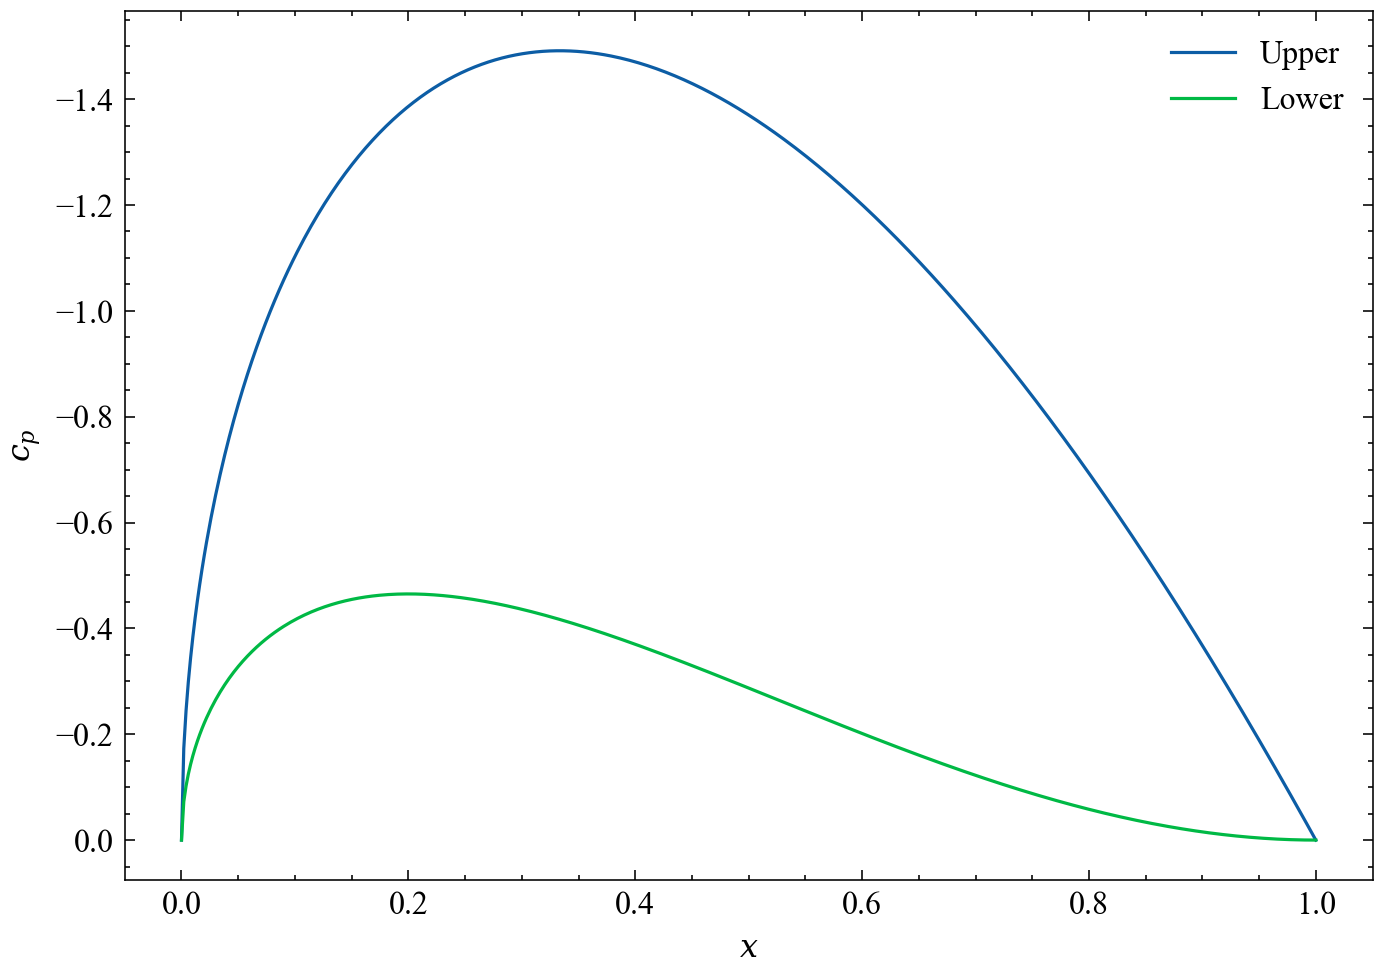

In [7]:
plt.figure(dpi=230, figsize=(7,5))
plt.style.use(['science', 'no-latex'])

plt.plot(x_vec, upper_corrected, label='Upper')
plt.plot(x_vec, lower_corrected, label='Lower')

plt.xlabel(r'$x$')
plt.ylabel(r'$c_p$')

plt.gca().invert_yaxis()
plt.legend()

plt.show()

In [8]:
cp_difference = interpolate.UnivariateSpline(x_vec, upper-lower)
lift_coefficient = -integrate.quad(cp_difference, 0, 1)[0]
corrected_cl = lift_coefficient*pg_correction

print('Lift Coefficient: ', np.round(lift_coefficient, decimals=6))
print('Corrected Lift Coefficient: ', np.round(corrected_cl, decimals=6))

Lift Coefficient:  0.628285
Corrected Lift Coefficient:  0.785357


Lift coefficient analytical solution
$$ \displaystyle \begin{aligned} C_{L,0} &= -\int_0^1 (c_{p,u} - c_{p,l}) dx \\ &= -\int_0^1 \left[-3.1x^{0.5}(1-x) + 1.3x^{0.5}(1-x)^2\right] dx \\ &= -\int_0^1 \left[ -3.1x^{0.5} + 3.1x^{1.5} + 1.3x^{0.5} - 2.6x^{1.5} + 1.3x^{2.5} \right]dx \\ &= -\int_0^1 \left[ 1.3x^{2.5} + 0.5x^{1.5} - 1.8x^{0.5} \right]dx \\ &= - \left[ {1.3\over3.5}x^{3.5} + {0.5 \over 2.5} x^{2.5} - {1.8 \over 1.5} x^{1.5} \right] \Big{|}_0^1 \\ &= -\left[ {1.3\over3.5} + {0.5 \over 2.5} - {1.8 \over 1.5} \right] + 0 \\ &= 0.628571 \end{aligned} $$

Corrected lift coefficient:
$$ \displaystyle \begin{aligned} C_L = {C_{L,0} \over \sqrt{1 - M_\infty^2}} &= {0.628571 \over \sqrt{1-0.6^2}} \\ &= 0.785714 \end{aligned} $$

In [9]:
# overwriting numerical solution in favor of analytical solution
corrected_cl = 0.785714

## Part C
Calculate the critical pressure coefficient for Mach 0.6 flow and then plot this limit on top of your compressible pressure coefficients. Show that a shock occurs on your upper surface.

In [10]:
k1 = 2 / (1.4 * np.power(mach_num, 2))
k2 = (1 + 0.5*(1.4-1)*np.power(mach_num, 2)) / (1 + 0.5*(1.4-1))
k3 = 1.4 / (1.4-1)

cp_crit = k1 * ((np.power(k2, k3)) - 1)

print('Critical pressure coefficient: ', np.round(cp_crit, decimals=4))

Critical pressure coefficient:  -1.2943


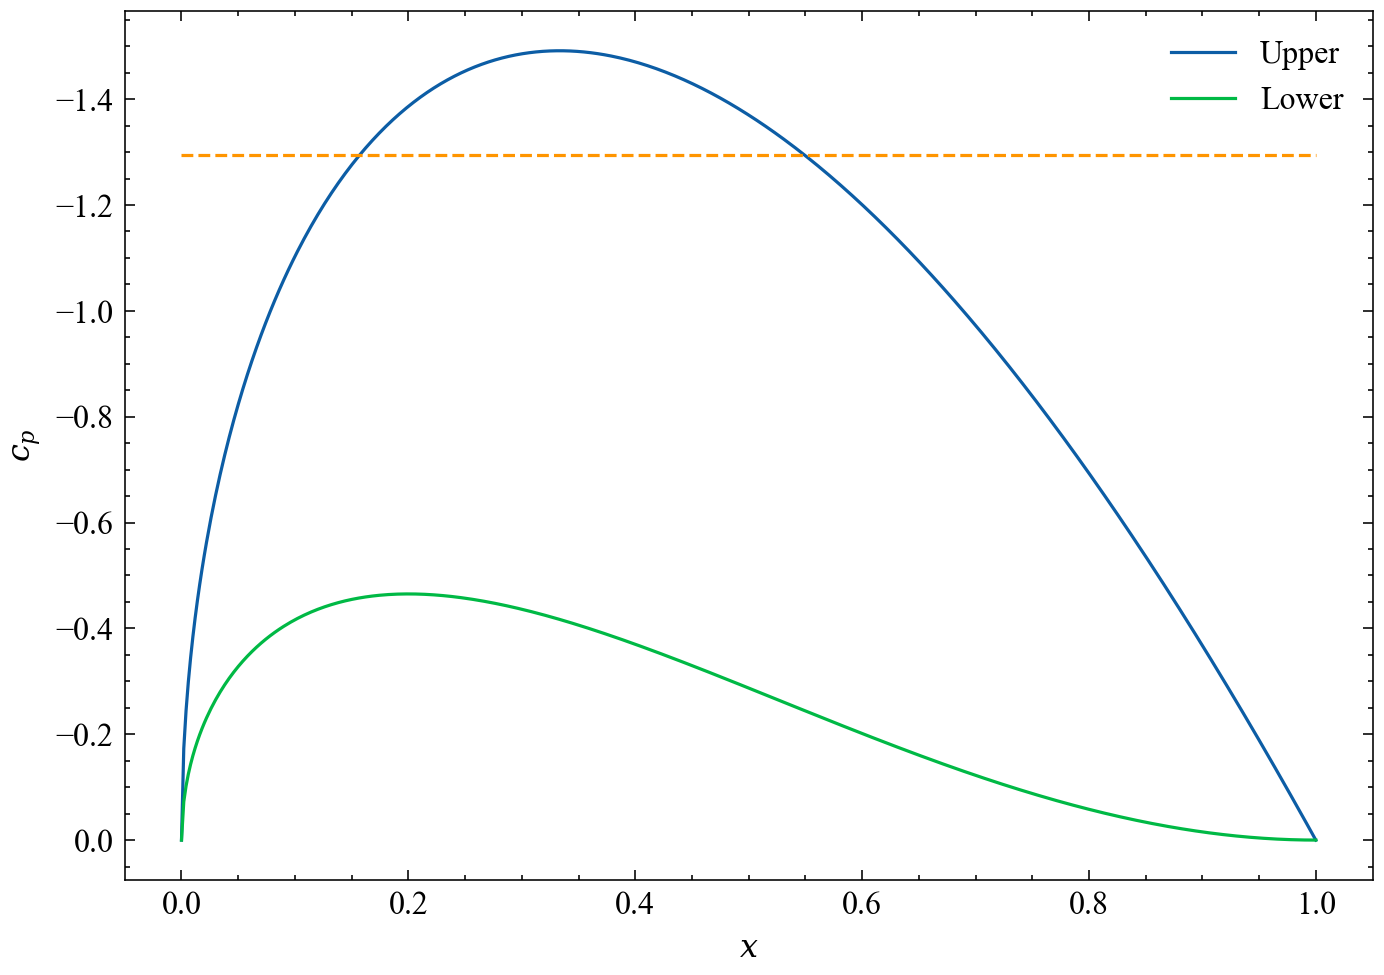

In [11]:
plt.figure(dpi=230, figsize=(7,5))
plt.style.use(['science', 'no-latex'])

plt.plot(x_vec, upper_corrected, label='Upper')
plt.plot(x_vec, lower_corrected, label='Lower')
plt.plot([0, 1], [cp_crit, cp_crit], linestyle='--')

plt.xlabel(r'$x$')
plt.ylabel(r'$c_p$')

plt.gca().invert_yaxis()
plt.legend()

plt.show()

## Part D
Calculate the value of the minimum Cp value and locate its x position.

In [12]:
# numerical solution using array values
cp_min = np.min(upper_corrected)
cp_minx = x_vec[np.argmin(upper_corrected)]

print('Minimum pressure coefficient: ', np.round(cp_min, decimals=6))
print('Minimum pressure coefficient location: ', np.round(cp_minx, decimals=6))

Minimum pressure coefficient:  -1.491486
Minimum pressure coefficient location:  0.332665


Minimum pressure coefficient and location analytical solution

$$ \displaystyle \begin{aligned} c_{p,u} &= -3.1 \sqrt{x} (1-x) = 3.1x^{1.5} -3.1 \sqrt{x} \\ {\text{d} \over \text{d} x} c_{p,u} = 0 &= 4.65 \sqrt{x} - {1.55 \over \sqrt{x}} \\ &= 4.65x - 1.55 \\ x &= {1.55 \over 4.65} \\ &= {1 \over 3} \end{aligned} $$

$$ \displaystyle \begin{aligned} c_{p,u} = -3.1 \sqrt{x} (1-x) &= -3.1 \sqrt{{1 \over 3}} \left(1-{1 \over 3}\right) \\ &= -1.19319 \end{aligned} $$

Corrected value:
$$ \displaystyle \begin{aligned} C_{p,min} = {C_{p,min,0} \over \sqrt{1 - M_\infty^2}} &= {-1.19319 \over \sqrt{1-0.6^2}} \\ &= -1.49149 \end{aligned} $$

In [13]:
# overwriting numerical solution in favour of analytical solution
cp_min = -1.49149
cp_minx = 1/3

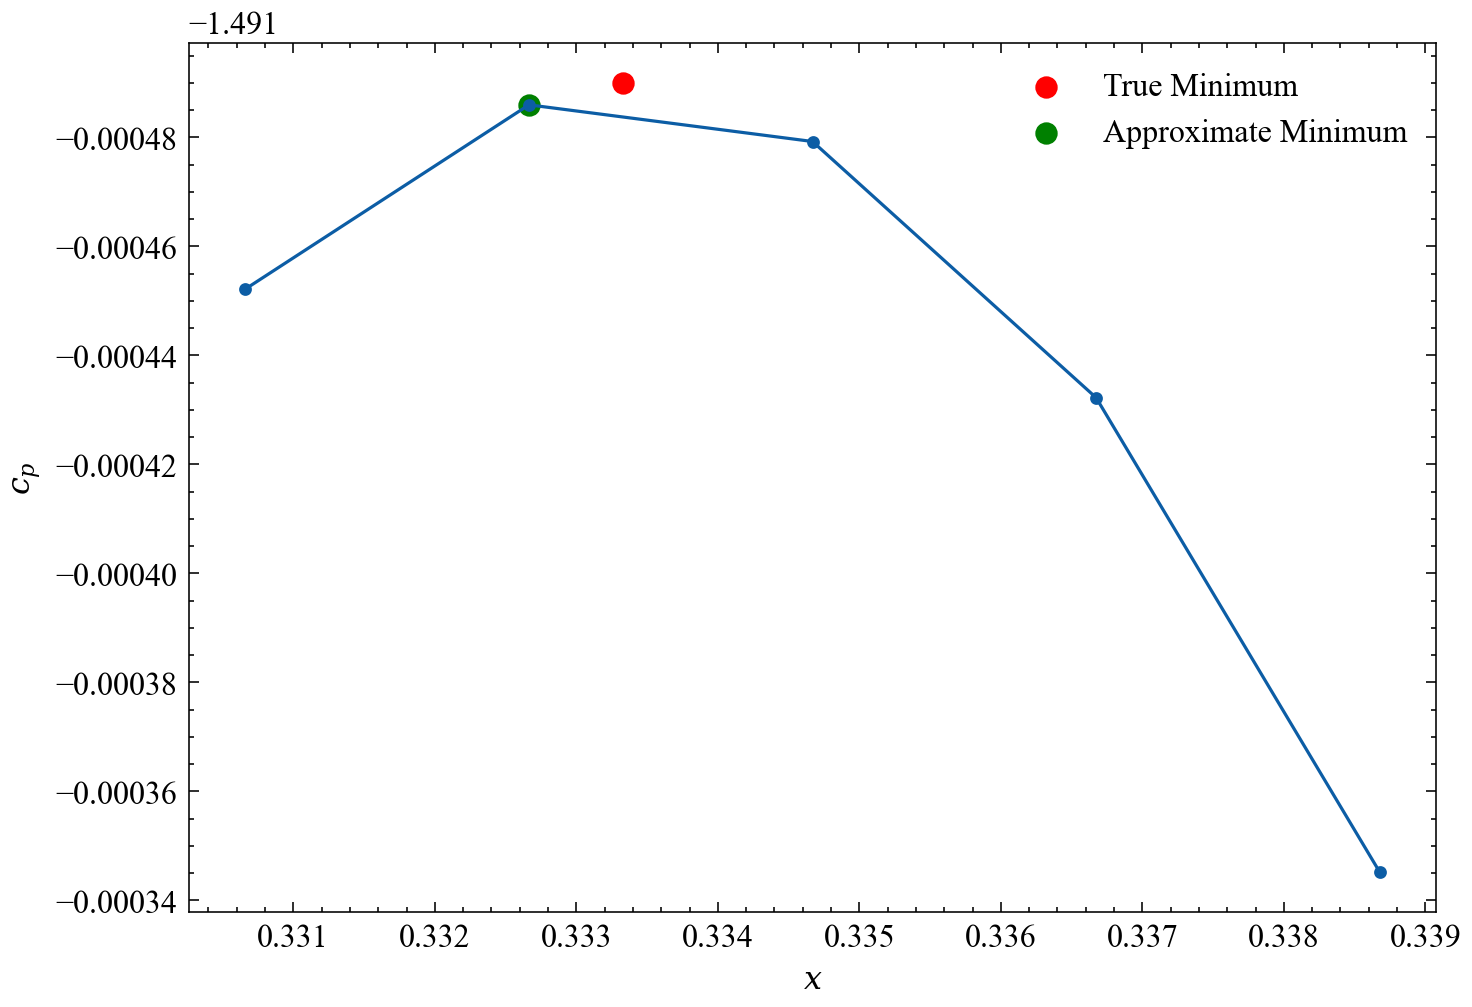

In [14]:
plt.figure(dpi=230, figsize=(7,5))
plt.style.use(['science', 'no-latex'])

plt.plot(x_vec[165:170], upper_corrected[165:170], marker='.')
plt.scatter(cp_minx, cp_min, color='r', label='True Minimum')
plt.scatter(x_vec[np.argmin(upper_corrected)], np.min(upper_corrected), color='g', label='Approximate Minimum')

plt.xlabel(r'$x$')
plt.ylabel(r'$c_p$')

plt.gca().invert_yaxis()
plt.legend()
plt.show()

## Part E
Using the equation:

$$\displaystyle C_{P,A} = {2 \over \gamma M_\infty^2} \left( {P_A \over P_\infty} - 1 \right) $$

calculate the max Mach number at the location of the minimum Cp value.

In [15]:
gamma = 1.4
afreestream_ratio = 1 + (cp_min * gamma * np.power(mach_num, 2))/2

Finding required pressure ratio:

$$ \displaystyle {P_A \over P_0} = {P_A \over P_\infty} {P_\infty \over P_0} $$

In [17]:
# pressure ratio at M = 0.6, P_inf / P_0 = 0.7840
astag_ratio = afreestream_ratio * 0.7840

print('Pressure ratio: ', np.round(astag_ratio, decimals=6))

Pressure ratio:  0.489329


At a pressure ratio of 0.489329, $M_1 = 1.06432$

In [18]:
# mach number at 0.489329: M = 1.06432
mach_a = 1.06432
mach_b = 0.940792

## Part F
Using the value of your maximum Mach number, what is the value of the subsonic Mach number immediately after your normal shock.

From the normal shock tables, if $M_A = 1.06432$, $M_B = 0.940792$

## Part G
Calculate the Cp value for the subsonic March number immediately after your normal shock.

In [19]:
# at M_B = 0.940792, p_B / p_0 = 0.565301
bfreestream_ratio = 0.565301 / 0.7840
print('Pressure ratio: ', np.round(bfreestream_ratio, decimals=6))

Pressure ratio:  0.721047


In [20]:
cp_b = (2/(1.4 * np.power(mach_num, 2)))*(bfreestream_ratio - 1)
print('Pressure coefficient: ', np.round(cp_b, decimals=6))

Pressure coefficient:  -1.106956


## Part H
Estimate the lift coefficient loss caused by the presence of the transonic shock. Draw a vertical line from the min Cp to the Cp value at the end of the normal shock. Draw a horizontal line at the Cp value at the end of the normal shock until it intersects the Cp distribution on the downstream side. Integrate this area.

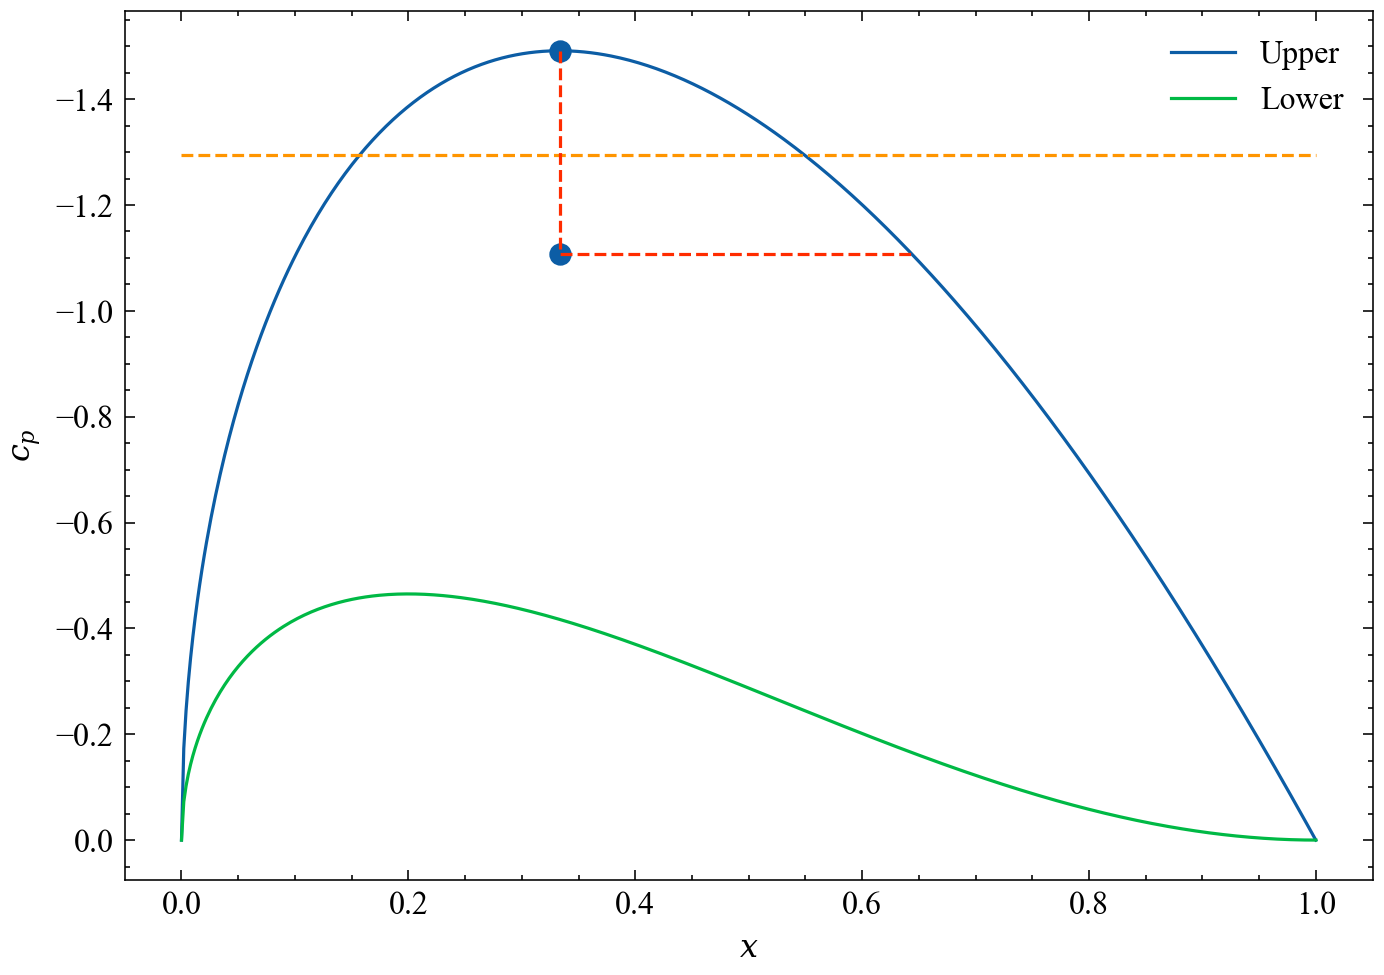

In [21]:
intersect_x = 0.6440388300

plt.figure(dpi=230, figsize=(7,5))
plt.style.use(['science', 'no-latex'])

plt.plot(x_vec, upper_corrected, label='Upper')
plt.plot(x_vec, lower_corrected, label='Lower')
plt.plot([0, 1], [cp_crit, cp_crit], linestyle='--')
plt.plot([cp_minx, cp_minx, intersect_x], [cp_min, cp_b, cp_b], linestyle='--')

plt.scatter([cp_minx, cp_minx], [cp_min, cp_b])

plt.xlabel(r'$x$')
plt.ylabel(r'$c_p$')

plt.gca().invert_yaxis()
plt.legend()

plt.show()

In [22]:
# numerical integration
cl_loss_interp = interpolate.UnivariateSpline(x_vec, upper_corrected - cp_b)
cl_loss = -integrate.quad(cl_loss_interp, cp_minx, intersect_x)[0]

print('Lift coefficient loss: ', np.round(cl_loss, decimals=6))

Lift coefficient loss:  0.085873


Lift coefficient loss analytical solution:

$$ \displaystyle \begin{aligned} \Delta C_L &= - \int_{x_{cp,min}}^{x_{intersect}} (c_{p,upper} - c_{p,shock} ) dx \\ &= - \int_{0.3333}^{0.6440} \left[ {-3.1 \over \sqrt{1-0.6^2}} \sqrt{x}(1 - x) + 1.106956 \right] dx \\ &= - \int_{0.3333}^{0.6440} \left[ {-3.1 \over \sqrt{1-0.6^2}} x^{0.5} + {3.1 \over \sqrt{1-0.6^2}} x^{1.5} + 1.106956 \right] dx \\ &= - \left( {3.1 \over 2.5 \sqrt{1-0.6^2}} x^{2.5} - {3.1 \over 1.5\sqrt{1-0.6^2}} x^{1.5} + 1.106956 x \right) \Big{|}_{0.3333}^{0.6440} \\ &= - \left( {3.1 \over 2.5\sqrt{1-0.6^2}} 0.6440^{2.5} - {3.1 \over 1.5\sqrt{1-0.6^2}} 0.6440^{1.5} + 1.106956 \cdot 0.6440 \right) + \left( {3.1 \over 2.5\sqrt{1-0.6^2}} 0.3333^{2.5} - {3.1 \over 1.5\sqrt{1-0.6^2}} 0.3333^{1.5} + 1.106956 \cdot 0.3333 \right) \\ &= 0.0775971 \end{aligned} $$

In [23]:
cl_loss = 0.0775971

## Part I
Make up for this lift coefficient loss by "adding" an equivalent amount of lift to the lower surface. Modify the velocity distribution on the lower surface to restore your lift coefficient to its intended unshocked value. Congratulation! You have just inversely designed your first transonic airfoil. Now if only you could describe its actual shape!!

Given equation:
$$ \displaystyle U_\text{lower} = U_\infty \sqrt{\left[1 + 1.3 \sqrt{x} (1-x)^2 \right] K \sin(Lx)} = U_\infty \sqrt{K \sin(Lx) + 1.3 K \sin(Lx) \sqrt{x} (1-x)^2 } $$

$$\displaystyle c_{p,\text{lower}} = 1 - K \sin(Lx) - 1.3 K \sin(Lx) \sqrt{x} (1-x)^2 $$

In [24]:
# defining numba functions for faster computation
@njit(nogil=True)
def cp_lower_new(x_in, k_in, l_in):
    arr = [[[1 - (k_in[k] * np.sin(l_in[l]*x_in[x]) - 1.3 * k_in[k] * np.sin(l_in[l]*x_in[x]) * np.power(x_in[x], 0.5) * np.power(1-x_in[x], 2)) for x in range(len(x_in))] for l in range(len(l_in))] for k in range(len(k_in))]
    return arr

In [25]:
k_vec = np.linspace(-5, 5, num=500)
l_vec = np.linspace(-5, 5, num=500)

In [26]:
%%time
# checking speed to perform 125,000,000 calculations using numba
cp_lower_arr = cp_lower_new(x_vec, k_vec, l_vec)

Wall time: 11.3 s


In [27]:
# find lift coefficient of each k and l configuration
# not able to implement numba due to use of interpolate and integrate functions
def lift_coeffs(cp_lower_in, x_in, k_in, l_in):
    # return 500x500 matrix of lift coefficients for each k,l configuration
    # subtract each cl by cl_loss to account for shock on upper surface
    
    arr = []
    
    for k in range(len(k_in)):
        arrl = []
        for l in range(len(l_in)):
            lower_arr = pg_correction * np.array(cp_lower_in[k][l])
            cp_interp = interpolate.UnivariateSpline(x_in, upper_corrected - lower_arr)
            cl = -integrate.quad(cp_interp, 0, 1)[0] - cl_loss
            
            arrl.append(cl)
            
        arr.append(arrl)
    
    return np.array(arr)

In [28]:
%%time
cl_solutions = lift_coeffs(cp_lower_arr, x_vec, k_vec, l_vec)

Wall time: 1min 15s


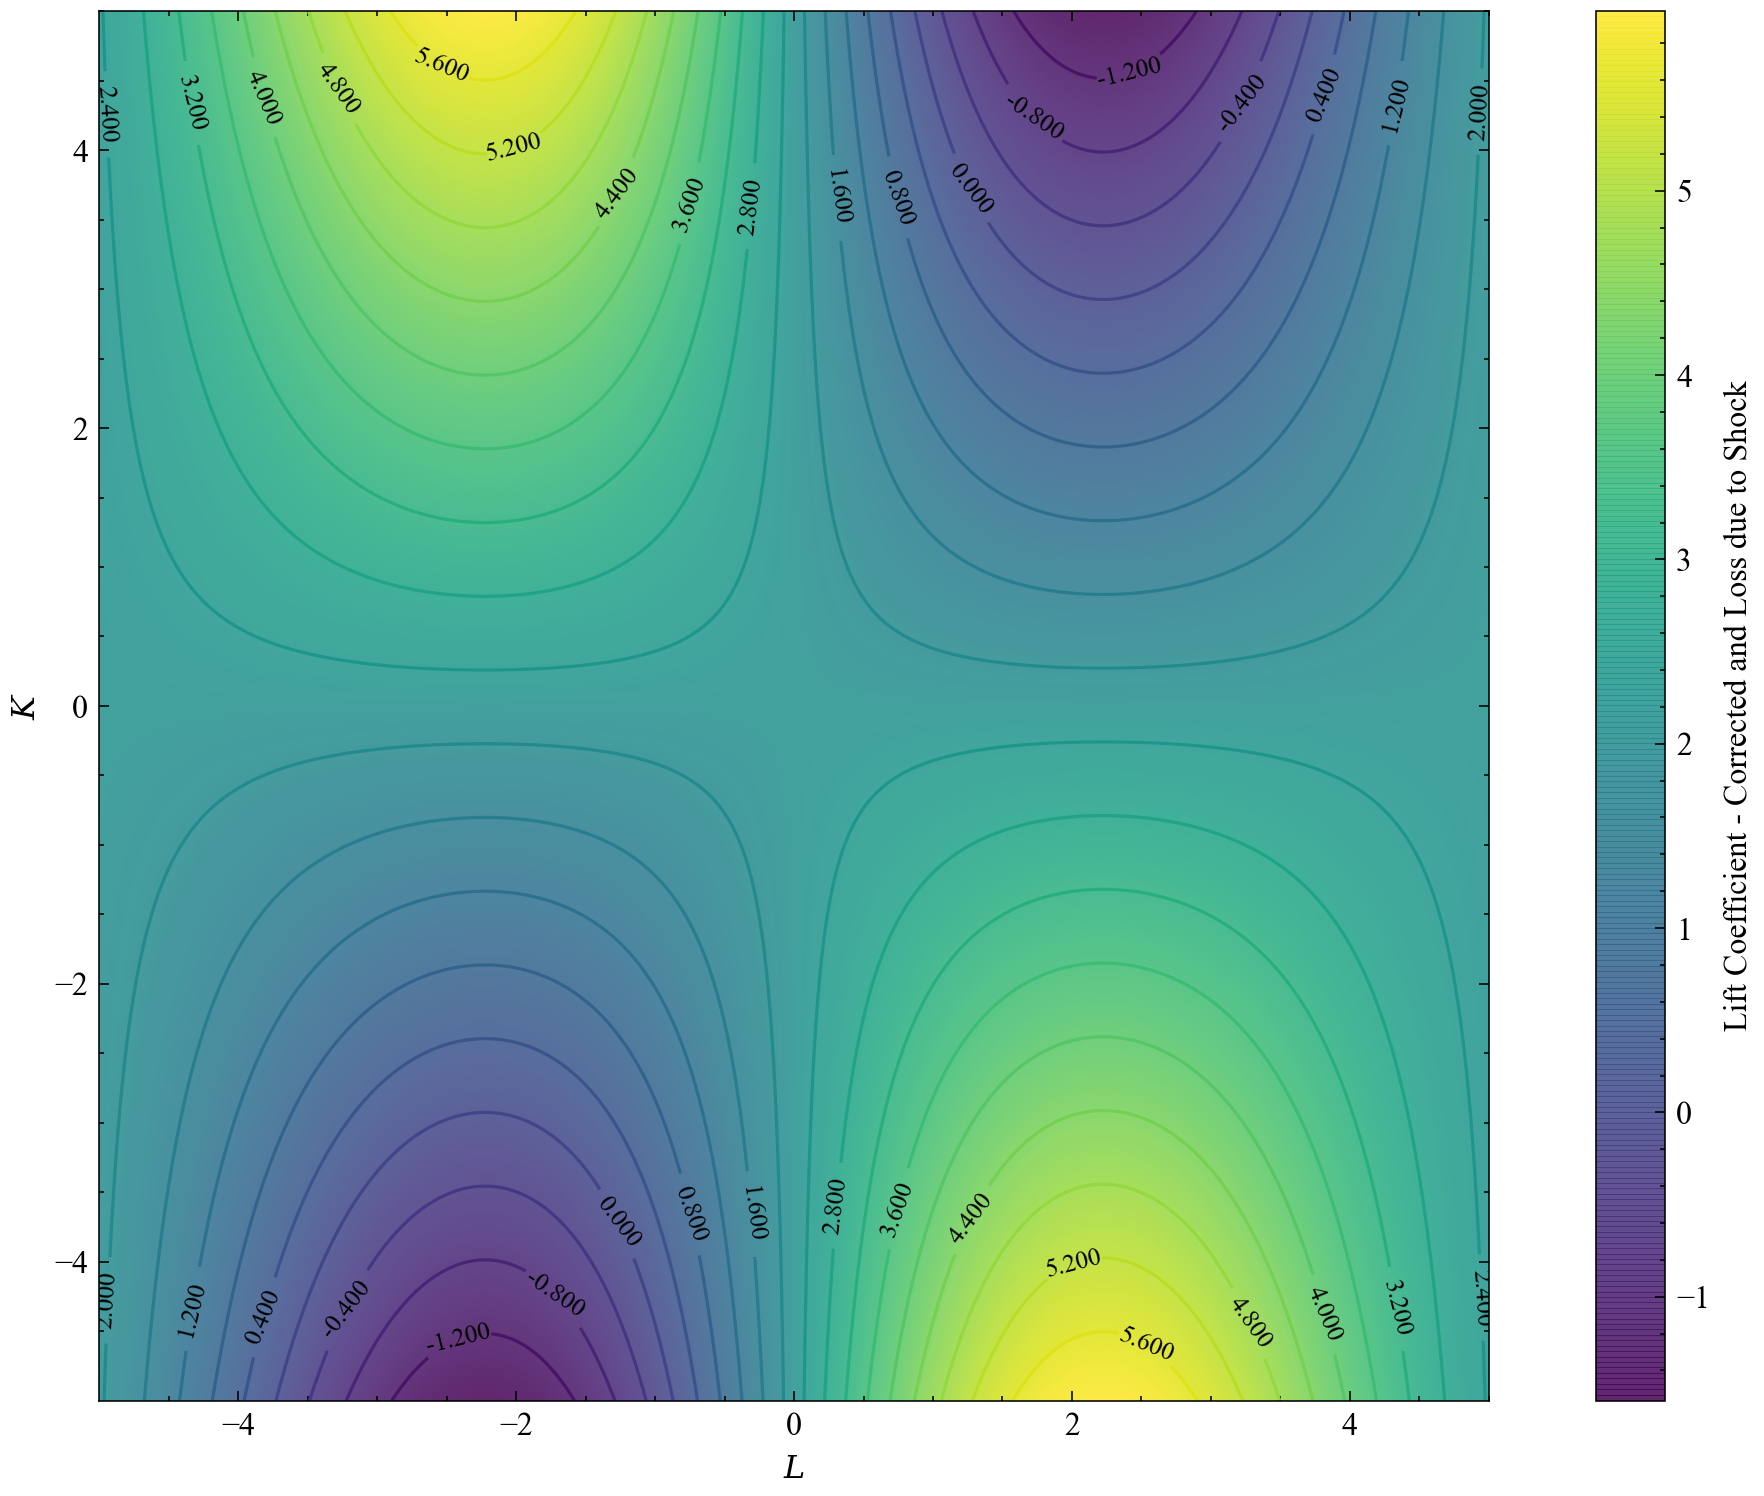

In [29]:
plt.figure(dpi=230, figsize=(12,8))
plt.style.use(['science', 'no-latex'])

k_mesh, l_mesh = np.meshgrid(k_vec, l_vec)

contours = plt.contour(k_mesh, l_mesh, cl_solutions, 20)
plt.clabel(contours, inline=True, fontsize=8, colors='black')

plt.imshow(cl_solutions, extent=[-5, 5, -5, 5], origin='lower', alpha=0.85)

plt.xlabel(r'$L$')
plt.ylabel(r'$K$')

plt.colorbar(label='Lift Coefficient - Corrected and Loss due to Shock')

plt.show()

In [30]:
# finding reasonable configuration
# choosing k,l values from above plot for C_L = 0.785357 ~ 0.8
k_ex = 1.8837
l_ex = 2.22

def cp_lower_example(x, k, l):
    return 1 - (k * np.sin(l*x) - 1.3 * k * np.sin(l*x) * np.power(x, 0.5) * np.power(1-x, 2))

In [31]:
lower_ex = pg_correction * cp_lower_example(x_vec, k_ex, l_ex)
cp_interp_ex = interpolate.UnivariateSpline(x_vec, upper_corrected - lower_ex)
cl_ex = -integrate.quad(cp_interp_ex, 0, 1)[0] - cl_loss

print('Example lift coefficient: ', np.round(cl_ex, decimals=6), '\nK = ', k_ex, ' L = ', l_ex)

Example lift coefficient:  0.785367 
K =  1.8837  L =  2.22
